# Yukawa Friedel-Tail

Testing out the Yukawa Friedel Tail potential

The YAML input file can be found [here](./input_files/C_rho5_T1ev_yft.yaml).


---
## Simulation

In Jupyter notebook you can run the following commands

In [1]:
# Import the usual libraries
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import os

plt.style.use('MSUstyle')

# Import sarkas
from sarkas.processes import PreProcess, Simulation, PostProcess

In [2]:
# Create the file path to the YAML input file
input_file_name = os.path.join('input_files', 'Al_rho2.7_T1eV_yft.yaml')

In [3]:
# pre = PreProcess(input_file_name)
# pre.setup(read_yaml=True)
# pre.run()

In [5]:
sim = Simulation(input_file_name)
sim.setup(read_yaml=True)
sim.run()







  _________             __                   
 /   _____/____ _______|  | _______    ______
 \_____  \\__  \\_  __ \  |/ /\__  \  /  ___/
 /        \/ __ \|  | \/    <  / __ \_\___ \ 
/_______  (____  /__|  |__|_ \(____  /____  >
        \/     \/           \/     \/     \/ 


An open-source pure-python molecular dynamics suite for non-ideal plasmas.




********************************************************************************
                                   Simulation                                   
********************************************************************************

Job ID: Al_rho2.7_T1eV_yft
Job directory: SarkasSimulations/Al_rho2.7_T1eV_yft
Simulation directory: 
SarkasSimulations/Al_rho2.7_T1eV_yft/Simulation

Equilibration dumps directory: 
SarkasSimulations/Al_rho2.7_T1eV_yft/Simulation/Equilibration/dumps
Production dumps directory: 
SarkasSimulations/Al_rho2.7_T1eV_yft/Simulation/Production/dumps

Equilibration Thermodynamics file: 
SarkasSimul

  0%|          | 0/10000 [00:00<?, ?it/s]


Equilibration Time: 0 hrs 8 min 26 sec


------------------------------Production------------------------------ 



  0%|          | 0/10000 [00:00<?, ?it/s]


Production Time: 0 hrs 8 min 27 sec

Total Time: 0 hrs 16 min 54 sec


========================= Filesize Estimates =========================

Equilibration:
	Checkpoint filesize: 0 GB 0 MB 355 KB 638 bytes
	Checkpoint folder size: 0 GB 34 MB 746 KB 312 bytes
Production:
	Checkpoint filesize: 0 GB 0 MB 355 KB 638 bytes
	Checkpoint folder size: 0 GB 34 MB 746 KB 312 bytes

Total occupied space: 0 GB 69 MB 468 KB 624 bytes


## Postprocessing

Now that our simulation is complete we need to check if the simulation was physically sound. 
The following lines which will initialize the `PostProcess` class and read the parameters of the simulation.

In [6]:
# Initialize the Postprocessing class
postproc = PostProcess(input_file_name)
# Read the simulation's parameters and assign attributes
postproc.setup(read_yaml=True)






 _______              __                
|     __|.---.-.----.|  |--.---.-.-----.
|__     ||  _  |   _||    <|  _  |__ --|
|_______||___._|__|  |__|__|___._|_____|
                                        


An open-source pure-python molecular dynamics suite for non-ideal plasmas.




********************************************************************************
                                 Postprocessing                                 
********************************************************************************

Job ID: Al_rho2.7_T1eV_yft
Job directory: SarkasSimulations/Al_rho2.7_T1eV_yft
PostProcessing directory: 
SarkasSimulations/Al_rho2.7_T1eV_yft/PostProcessing

Equilibration dumps directory: 
SarkasSimulations/Al_rho2.7_T1eV_yft/Simulation/Equilibration/dumps
Production dumps directory: 
SarkasSimulations/Al_rho2.7_T1eV_yft/Simulation/Production/dumps

Equilibration Thermodynamics file: 
SarkasSimulations/Al_rho2.7_T1eV_yft/Simulation/Equilibration/Equilibration

Let's check the temperature and energy

In [7]:
from sarkas.tools.observables import RadialDistributionFunction, Thermodynamics



=========================== Thermodynamics ===========================
Data saved in: 
 SarkasSimulations/Al_rho2.7_T1eV_yft/PostProcessing/Thermodynamics/Production/Thermodynamics_Al_rho2.7_T1eV_yft.h5
Data accessible via: self.dataframe_slices, self.dataframe

Time Series Data:
No. of blocks = 1
No. dumps per block = 100
Total time per block: T = 5.0000e-13 [s] ~ 15 plasma periods
Time interval: dt = 5.0000e-15 [s] ~ 1.5e-01 plasma period


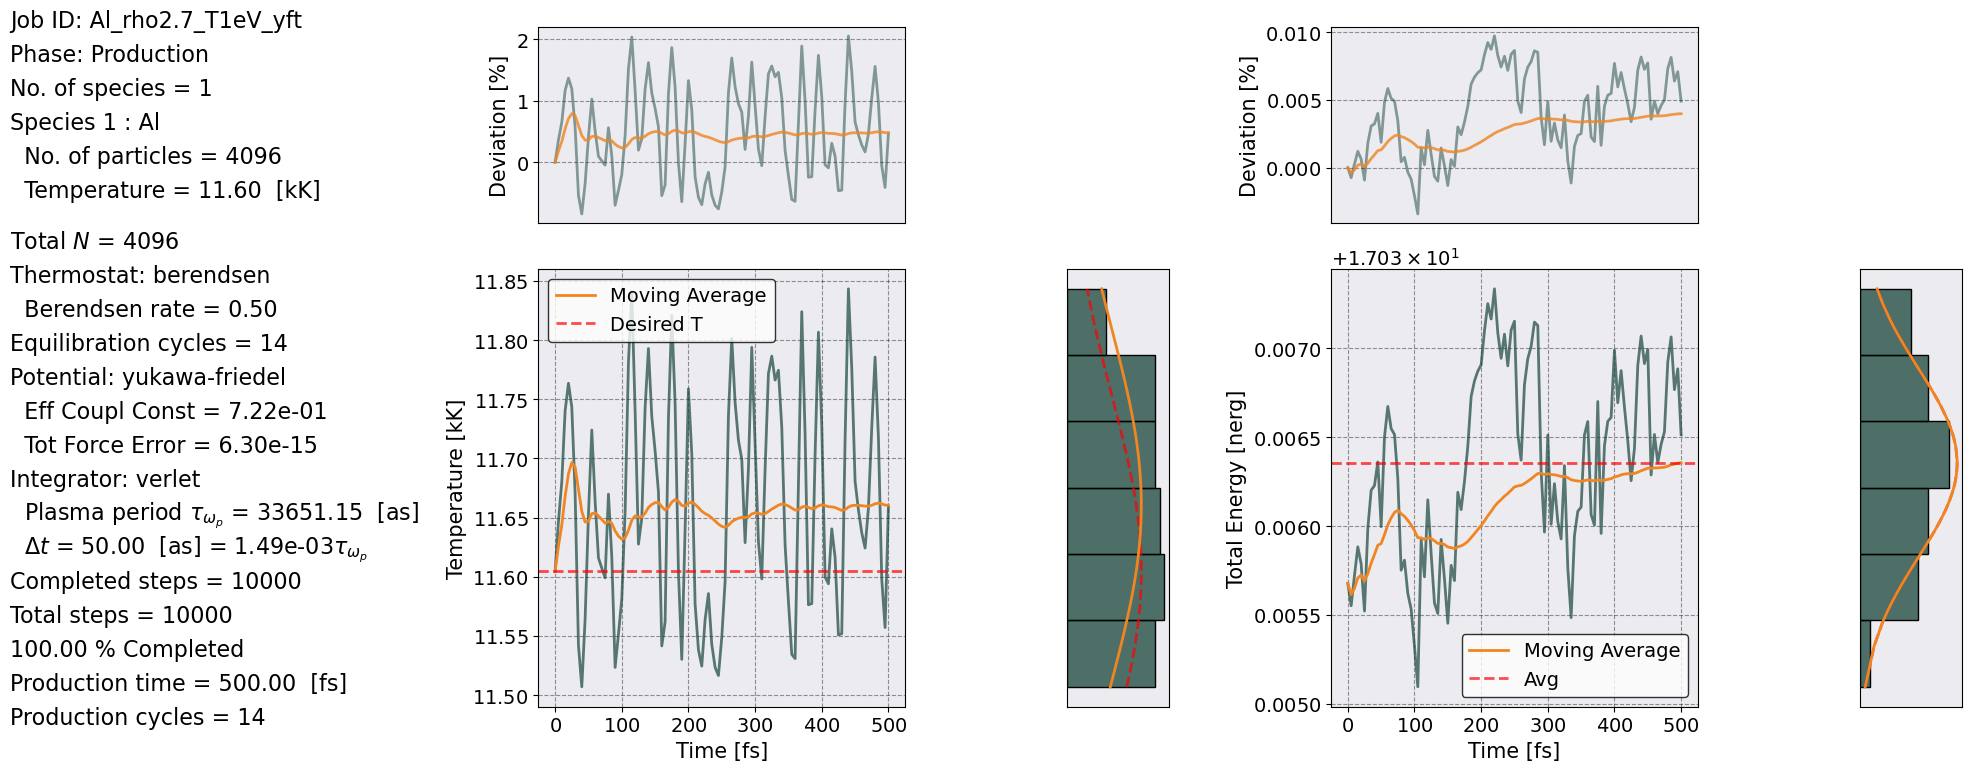

In [8]:
therm = Thermodynamics()
therm.setup(postproc.parameters, phase = "production")
therm.temp_energy_plot(postproc)

Noice! The temperature (left plots) and total energy (plots on the right) are both conserved in the production phase. They do oscillate widly, but this is fine as long as the deviation percentages are within an accepted range. 

The deviation percentages (top plots) are calculated as

$$\Delta T(t) = \frac{T(t) - T_{\rm desired}}{T_{\rm desired}}, \quad \Delta E = \frac{E(t) - E(t = 0)}{E(t = 0)}. $$ 

___
## Observables

The most common observable is the radial distribution function, _i.e._ $g(r)$. This can be calculated using the following code.

In [9]:
rdf = RadialDistributionFunction()
rdf.setup(postproc.parameters)
rdf.compute()



==================== Radial Distribution Function ====================
Data saved in: 
 SarkasSimulations/Al_rho2.7_T1eV_yft/PostProcessing/RadialDistributionFunction/Production/RadialDistributionFunction_Al_rho2.7_T1eV_yft.h5
Data accessible via: self.dataframe_slices, self.dataframe
No. bins = 250
dr = 0.0253 a_ws = 4.0000e-10 [cm]
Maximum Distance (i.e. potential.rc)= 6.3212 a_ws = 1.0000e-07 [cm]
Time Series Data:
No. of blocks = 1
No. dumps per block = 100
Total time per block: T = 5.0000e-13 [s] ~ 15 plasma periods
Time interval: dt = 5.0000e-15 [s] ~ 1.5e-01 plasma period


Calculating RDF for slice:   0%|          | 0/1 [00:00<?, ?it/s]


Radial Distribution Function Calculation Time: 0 sec 151 msec 299 usec 83 nsec


In [10]:
# Let's look at the data 
rdf.dataframe.head()

Interparticle Al-Al RDF    
       Distance      Mean Std
0  0.000000e+00       0.0 NaN
1  6.000000e-10       0.0 NaN
2  1.000000e-09       0.0 NaN
3  1.400000e-09       0.0 NaN
4  1.800000e-09       0.0 NaN

In [29]:
# Read webplotdigitez data of Fig. 9a of YFT paper.
data = np.loadtxt('input_files/Al_paper_data_gr.csv', delimiter = ',')
data[:5]

array([[1.08152174, 0.01800709],
       [1.13460566, 0.06244169],
       [1.15735592, 0.08658332],
       [1.17328109, 0.12946845],
       [1.19148129, 0.18198358]])

The RDF is computed and stored in a `pandas.DataFrame`. The columns `Mean` and `Std` refer to the subdivision of the simulation data. We will explain this in another notebook. For now let's make a plot.

[Text(0.5, 1.0, 'Al $\\rho = 2.7$ g/cc at T = 1 eV')]

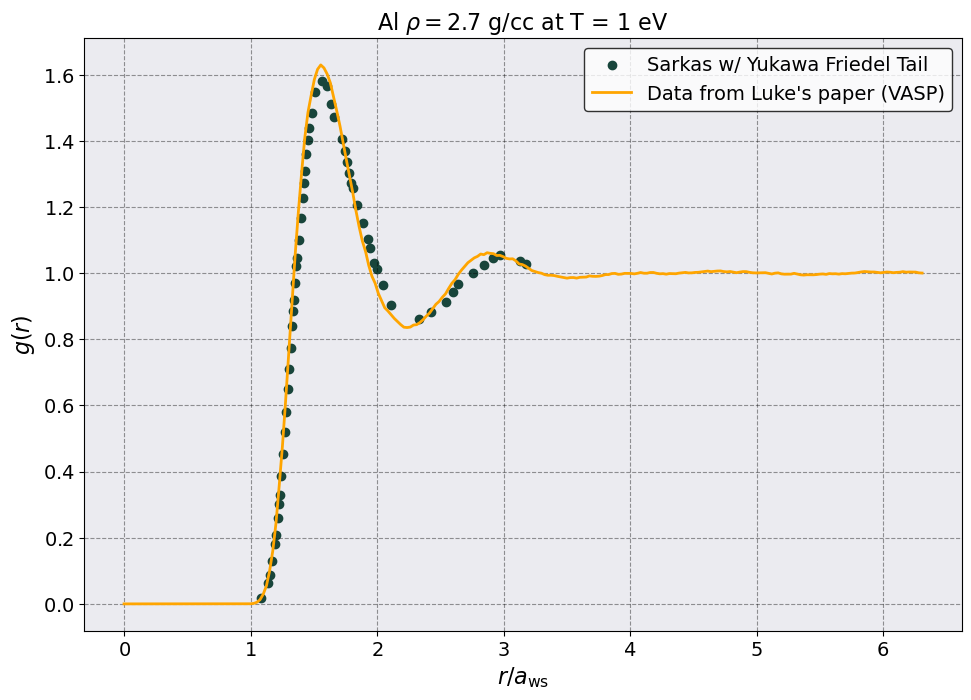

In [36]:
# Let's make a plot
fig, ax = plt.subplots(1,1)
ax.scatter(data[:,0], data[:,1], label = 'Data')
ax = rdf.plot(
    scaling=rdf.a_ws,
    y = [("Al-Al RDF", "Mean")],
    xlabel = r'$r/a_{\rm ws}$',
    ylabel = r'$g(r)$',
    color = 'orange',
    ax = ax
)
ax.legend(["Sarkas w/ Yukawa Friedel Tail", "Data from Luke's paper (VASP)"])
ax.set(title = r"Al $\rho = 2.7$ g/cc at T = 1 eV")

Good agreement. Differences might due to the misalignment of the image in webplotdigitiz